# <font color='blue'> Car Price Prediction

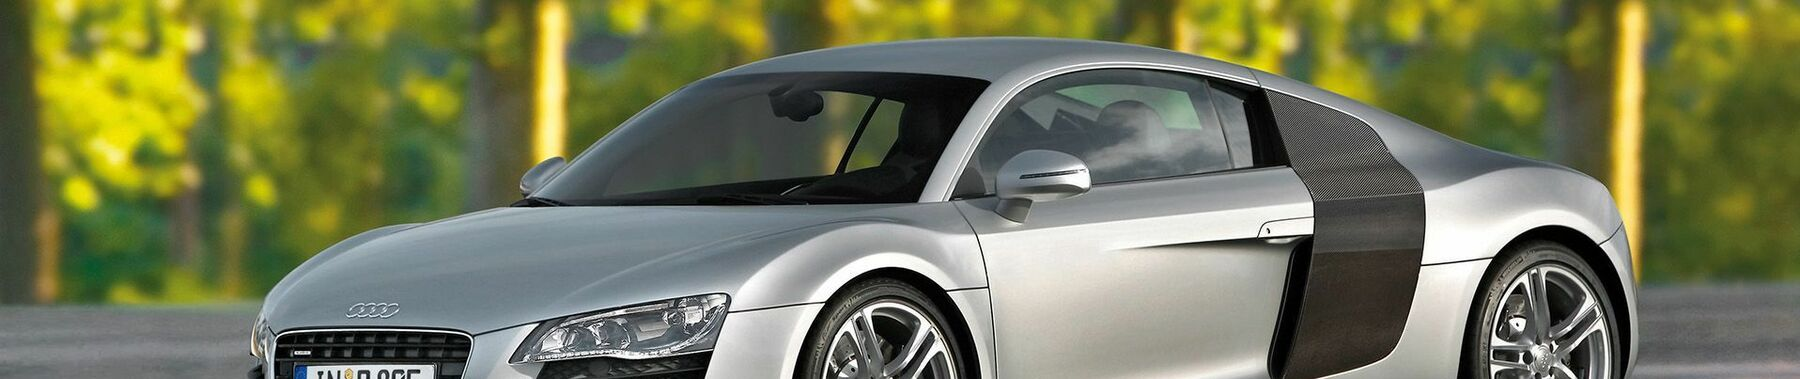

In [1]:
from IPython.display import Image
Image("dataset-cover.jpg")

This dataset was taken from the Kaggle community, at this link: https://www.kaggle.com/hellbuoy/car-price-prediction

#### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

#### Business Goal:

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


* Please Note : The dataset provided is for learning purpose. Please don’t draw any inference with real world scenario.

In addition to the Business Goal, let's try to answer 5 business questions:

* 1 - Car prices are around how many dollars?
* 2 - What kind of car appears most in the dataset?
* 3 - What type of fuel is most used?
* 4 - What are the most common engine power?
* 5 - What is the most common insurance risk classification?

## Importing required libraries

In [2]:
import pandas as pd 
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Opening the dataset

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Dataset description

In [4]:
# There have been some changes to the table to stay presentable

dicionario = pd.read_excel('Data Dictionary - carprices.xlsx')
dicionario = dicionario.iloc[3:29,[7,11]].reset_index().drop(columns=['index']) # Remove blank rows and columns
dicionario = dicionario.rename(columns={'Unnamed: 7' : 'Column', 'Unnamed: 11' : 'Description'}) # Rename the columns
dicionario

,Column,Description
0,Car_ID,Unique id of each observation (Interger)
1,Symboling,"Its assigned insurance risk rating, A value of..."
2,carCompany,Name of car company (Categorical)
3,fueltype,Car fuel type i.e gas or diesel (Categorical)
4,aspiration,Aspiration used in a car (Categorical)
5,doornumber,Number of doors in a car (Categorical)
6,carbody,body of car (Categorical)
7,drivewheel,type of drive wheel (Categorical)
8,enginelocation,Location of car engine (Categorical)
9,wheelbase,Weelbase of car (Numeric)


## Analisando o dataset

In [5]:
# Information about attribute types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Number of lines and columns
df.shape

(205, 26)

In [7]:
# Statistical description of numeric dataset attributes
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# No null value
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

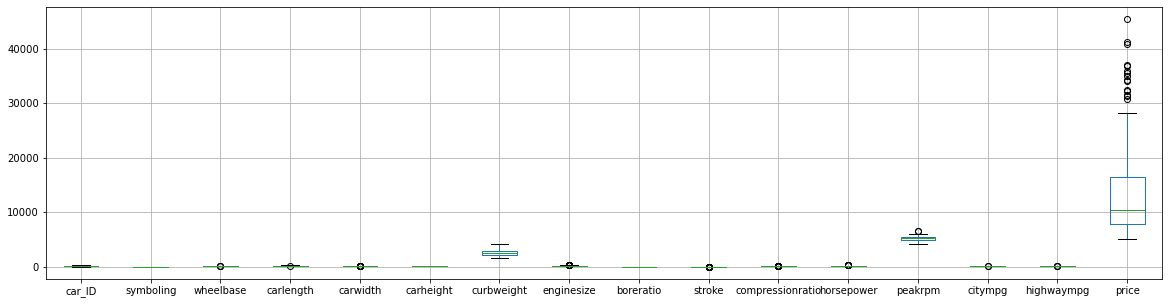

In [9]:
# Outliers are mainly found in our target column: price

plt.figure(figsize=(20,5))
df.boxplot()
print()

### Removing outliers in 'price' using IQR method.

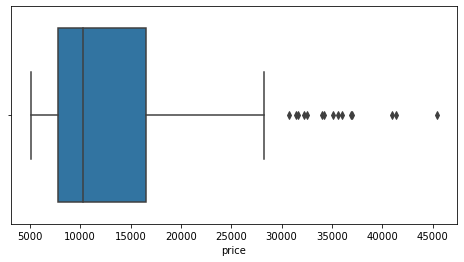

In [10]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['price'])
plt.show()

In [11]:
Q1 = df['price'].quantile(.25)
Q3 = df['price'].quantile(.75)

Q1,Q3

(7788.0, 16503.0)

In [12]:
IQR = Q3 - Q1
IQR

8715.0

In [13]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

lower,upper

(-5284.5, 29575.5)

#### Defining lower / upper

In [14]:
df = df[df['price'] >= lower] 
df = df[df['price'] <= upper]

In [15]:
# There were 205 lines. Now, we have 190 lines.
df.shape

(190, 26)

In [16]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,105.463158,0.836842,98.276316,172.811579,65.635263,53.755263,2480.031579,118.415789,3.303579,3.251263,10.183789,97.231579,5124.473684,25.947368,31.521053,11509.400879
std,59.925052,1.230009,5.280965,11.375806,1.844961,2.425645,445.890595,26.854315,0.261671,0.304045,4.015859,30.225940,471.593591,6.212921,6.476419,4968.444389
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,20.000000,5118.000000
25%,54.250000,0.000000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.127500,8.700000,70.000000,4800.000000,21.000000,26.000000,7701.250000
50%,106.500000,1.000000,96.500000,172.500000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,92.000000,5200.000000,25.000000,31.000000,9959.500000
75%,157.750000,2.000000,100.400000,178.350000,66.500000,55.500000,2823.750000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,15197.500000
max,205.000000,3.000000,114.200000,198.900000,71.400000,59.800000,3750.000000,183.000000,3.940000,3.900000,23.000000,200.000000,6600.000000,49.000000,54.000000,28248.000000


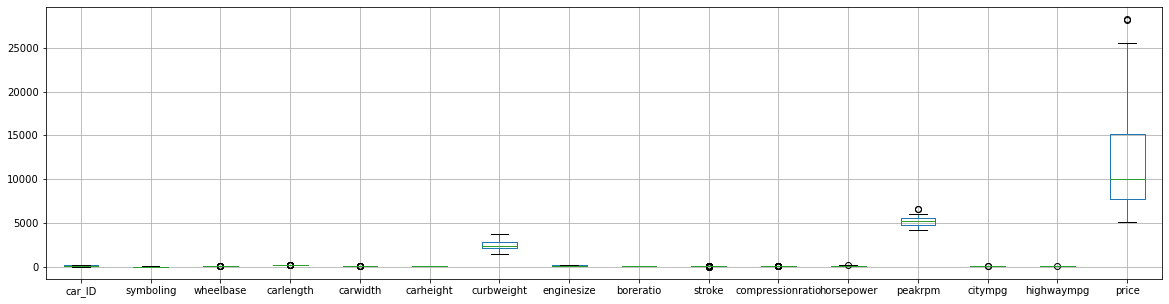

In [17]:
plt.figure(figsize=(20,5))
df.boxplot()
print()

## Business Questions

### 1 - Car prices are around how many dollars?
> Most prices are concentrated between 5000.00 and 10000.00

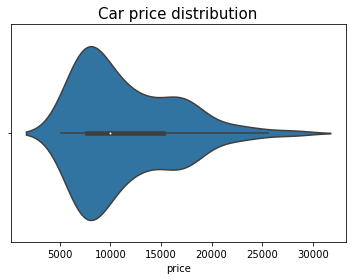

In [18]:
plt.title('Car price distribution', fontsize = 15)
sns.violinplot(x = 'price', data = df)
plt.show()

### 2 - What kind of car appears most in the dataset?

> The sedan-type cars are the most popular.

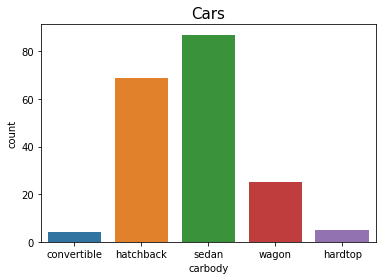

In [19]:
plt.title('Cars', fontsize = 15)
sns.countplot(df['carbody'])
plt.show()

### 3 - What type of fuel is most used?
> Gasoline is the most used fuel, with 90.0%, while diesel is used in 10.0% of cases.

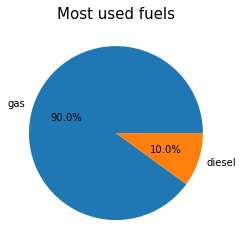

In [20]:
fueltype = df['fueltype'].value_counts()
total = df['fueltype'].value_counts().sum()

porcentagem = fueltype/total
# plotar o gráfico de pizza
plt.title('Most used fuels', fontsize = 15)
plt.pie(porcentagem, labels=['gas', 'diesel'], autopct='%1.1f%%');

### 4 - What are the most common engine power?
> The distribution shows that engines with power between 60 and 120 hp are the most common.

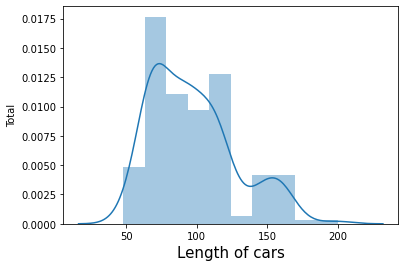

In [21]:
sns.distplot(df['horsepower'])
plt.title('', fontsize = 15)
plt.xlabel('Length of cars', fontsize = 15)
plt.ylabel('Total')
plt.show()

### 5 - What is the most common insurance risk classification?

> A zero (0) rating is the most common among all insurance risk ratings. The assigned insurance risk rating is a value ranging from +3 (indicates that the car is risky) to -3 (which is probably very safe).

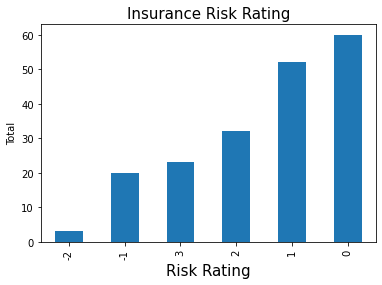

In [22]:
df['symboling'].value_counts().sort_values().plot.bar()
plt.title('Insurance Risk Rating', fontsize = 15)
plt.xlabel('Risk Rating', fontsize = 15)
plt.ylabel('Total')
plt.show()

## Preparing the data

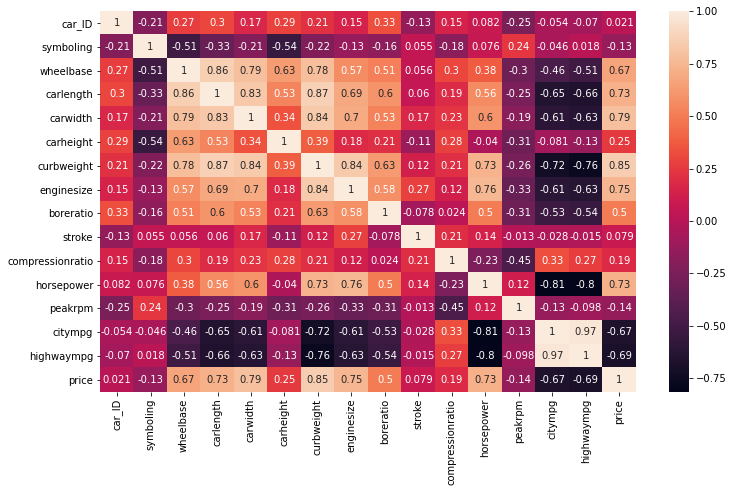

In [23]:
# Correlation between columns

plt.figure(figsize=(12,7))
correlacao = df.corr()
sns.heatmap(correlacao, annot = True);

In [24]:
# Analyzing only the correlation between the target variable (price) with the other columns

correlations = df.corr()['price'].drop('price')
correlations.sort_values()

highwaympg         -0.686157
citympg            -0.670256
peakrpm            -0.136189
symboling          -0.128941
car_ID              0.020822
stroke              0.079378
compressionratio    0.185007
carheight           0.254564
boreratio           0.499244
wheelbase           0.667712
horsepower          0.727394
carlength           0.729734
enginesize          0.749883
carwidth            0.791890
curbweight          0.853951
Name: price, dtype: float64

> The enginesize, curbweight, horsepower, carwidth and carlength columns have a strong positive correlation with the price column, while the highwaympg and citympg columns have a strong negative correlation.

#### Transforming categorical variables into numerical variables, so that these variables can also enter the model that will predict which ones are best for the algorithms.

In [25]:
df['fueltype'] = df['fueltype'].map({'gas':'0','diesel':'1'})
df['aspiration'] = df['aspiration'].map({'std':'0','turbo':'1'})
df['doornumber'] = df['doornumber'].map({'two':'2','four':'4'})
df['carbody'] = df['carbody'].map({'convertible':'0','hatchback':'1','sedan':'2','wagon':'3','hardtop':'4'})
df['drivewheel'] = df['drivewheel'].map({'rwd':'0','fwd':'1','4wd':'2'})
df['enginelocation'] = df['enginelocation'].map({'front':'0','rear':'1'})
df['cylindernumber'] = df['cylindernumber'].map({'four':'4','six':'6','five':'5','three':'3','twelve':'12','two':'2','eight':'8'})

In [26]:
# Transforming object into int32

df['fueltype'] = df['fueltype'].astype(int)
df['aspiration'] = df['aspiration'].astype(int)
df['doornumber'] = df['doornumber'].astype(int)
df['carbody'] = df['carbody'].astype(int)
df['drivewheel'] = df['drivewheel'].astype(int)
df['enginelocation'] = df['enginelocation'].astype(int)
df['cylindernumber'] = df['cylindernumber'].astype(int)

In [27]:
# Only numeric variables

numerical_columns = df.select_dtypes(include = ['int32','int64','float'])
numerical_columns.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,2,0,0,0,88.6,168.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,0,2,0,0,0,88.6,168.8,...,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,0,2,1,0,0,94.5,171.2,...,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,0,0,4,2,1,0,99.8,176.6,...,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,0,0,4,2,2,0,99.4,176.6,...,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Separating training data and testing data

In [28]:
from sklearn.model_selection import train_test_split

X = df[['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']] # Only numeric values (21 features)

y= df['price'] # Target column

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=55)

In [29]:
# Printing the results

print("{0:0.2f}% are training data".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% are testing data".format((len(X_test)/len(df.index)) * 100))

70.00% are training data
30.00% are testing data


In [30]:
X_train.shape # Rows and columns for training

(133, 21)

In [31]:
X_test.shape # Rows and columns for testing

(57, 21)

## Training and testing the model

In [32]:
# Model evaluation metrics

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Using RMSE, MAE and R2 as metrics

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
prediction_lr = lr.predict(X_test)

print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""Linear Regresson \t\t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,prediction_lr), 
                                                                     np.sqrt(mean_squared_error(y_test, prediction_lr)), 
                                                                     mean_absolute_error(lr.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
Linear Regresson 		 0.76 		 2.446e+03 	 1836.14


### Decision Trees Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42) 
dtr.fit(X_train, y_train) 
prediction_dtr = dtr.predict(X_test)

print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,prediction_dtr), 
                                                                     np.sqrt(mean_squared_error(y_test, prediction_dtr)), 
                                                                     mean_absolute_error(dtr.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
Decision Tree Regressor 	 0.90 		 1.557e+03 	 1195.00


### Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=10, random_state=42)
rfr.fit(X_train, y_train.ravel()) 
prediction_rfr = rfr.predict(X_test)

print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""Random Forest Regressor \t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,prediction_rfr), 
                                                                     np.sqrt(mean_squared_error(y_test, prediction_rfr)), 
                                                                     mean_absolute_error(rfr.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
Random Forest Regressor 	 0.90 		 1.613e+03 	 1149.30


### KNeighborsRegressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train,y_train)
prediction_knr = knr.predict(X_test)


print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""KNeighborsRegressor \t\t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,prediction_knr), 
                                                                     np.sqrt(mean_squared_error(y_test, prediction_knr)), 
                                                                     mean_absolute_error(knr.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
KNeighborsRegressor 		 0.76 		 2.485e+03 	 1583.05


### Support Vector Regressor

In [37]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
prediction_svr = svr.predict(X_test)

print("Model\t\t\t\t R2 \t\t RMSE \t\t MAE")
print("""Support Vector Regressor \t {:.2f} \t\t {:.4} \t {:.2f}""".format(r2_score(y_test,prediction_svr), 
                                                                     np.sqrt(mean_squared_error(y_test, prediction_svr)), 
                                                                     mean_absolute_error(svr.predict(X_test), y_test)))

Model				 R2 		 RMSE 		 MAE
Support Vector Regressor 	 0.75 		 2.495e+03 	 1596.32


## Evaluating with Cross Validation

> Cross Validation is a widely used technique for evaluating the performance of machine learning models. Cross Validation consists of partitioning data into sets (parts), where one set is used for training and another set is used for testing and evaluating the model's performance. The use of CV has high chances of detecting if your model is overfitting your training data, that is, suffering overfitting. The cross_val_score function receives as parameter the model, all training data, class data, the amount of folds and the evaluation method.

In [38]:
from sklearn.model_selection import cross_val_score # Importing the Cross Validation

### Linear Regression

In [39]:
lr_scores = cross_val_score(lr, X_train,y_train, cv=5, scoring='r2')
print(lr_scores)
print("Mean:", lr_scores.mean())

[0.79632337 0.6232477  0.66550332 0.80107988 0.81062088]
Mean: 0.7393550297924475


### Decision Trees Regressor

In [40]:
dtr_scores = cross_val_score(dtr, X_train,y_train, cv=5, scoring='r2')
print(dtr_scores)
print("Mean:", dtr_scores.mean())

[0.73801835 0.52221886 0.40216105 0.62010096 0.38649739]
Mean: 0.5337993236604552


### Random Forest Regressor

In [41]:
rfr_scores = cross_val_score(rfr, X_train,y_train, cv=5, scoring='r2')
rfr_scores
print("Mean:", rfr_scores.mean())

Mean: 0.736804232339426


### KNeighborsRegressor

In [42]:
knr_scores = cross_val_score(knr, X_train,y_train, cv=5, scoring='r2')
knr_scores
print("Mean:", knr_scores.mean())

Mean: 0.6918308346598675


### Support Vector Regressor

In [43]:
svr_scores = cross_val_score(svr, X_train,y_train, cv=5, scoring='r2')
svr_scores
print("Mean:", svr_scores.mean())

Mean: 0.7169296790190659


## Comparing and evaluating models

In [44]:
# Table summary for better viewing

resultados = pd.DataFrame([
    {'Algorithm' : 'Linear Regression', 'Original' : r2_score(y_test,prediction_lr), 'Cross-validation': lr_scores.mean()},
    {'Algorithm' : 'Decision Trees Regressor', 'Original' : r2_score(y_test,prediction_dtr), 'Cross-validation': dtr_scores.mean()},
    {'Algorithm' : 'Random Forest Regressor', 'Original' : r2_score(y_test,prediction_rfr), 'Cross-validation': rfr_scores.mean()},
    {'Algorithm' : 'KNeighborsRegressor', 'Original' : r2_score(y_test,prediction_knr), 'Cross-validation': knr_scores.mean()},
    {'Algorithm' : 'Support Vector Regressor', 'Original' : r2_score(y_test,prediction_svr), 'Cross-validation': svr_scores.mean()}
])

resultados.sort_values(by=['Cross-validation'], ascending=False)

,Algorithm,Original,Cross-validation
0,Linear Regression,0.764486,0.739355
2,Random Forest Regressor,0.897571,0.736804
4,Support Vector Regressor,0.754953,0.716930
3,KNeighborsRegressor,0.756933,0.691831
1,Decision Trees Regressor,0.904553,0.533799


> Some models improved and others worsened when using the cross-validation technique, with Coefficient of Determination (R²) as the scoring system.

> KNeighborsRegressor, for example, scored better without Cross-validation, while Linear Regression scored higher with Cross-validation compared to the original model.

> Linear Regression was the best model, with 0.739355 points, using Cross-validation. Without Cross-Validation, Random Forest Regressor had the best result, with 0.897571 points.

## Saving the best model

In [45]:
import pickle
filename = 'rfr_model.sav'
pickle.dump(rfr, open(filename,'wb'))

### Loading the model and forecasting with new datasets

> (X_test, Y_test must be new datasets prepared with the proper cleanup and transformation procedure)

In [46]:
load_model = pickle.load(open(filename, 'rb'))

In [47]:
resultado = load_model.predict(X_test[:100])

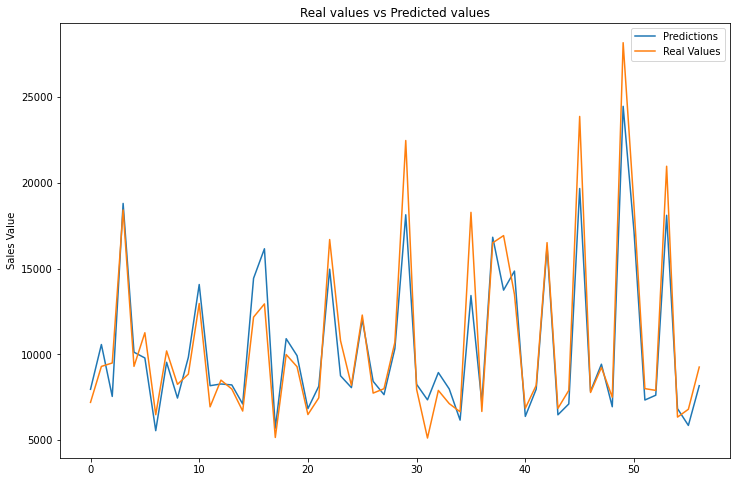

In [48]:
plt.figure(figsize=(12,8))

plt.title('Real values vs Predicted values')
plt.ylabel('Sales Value')
plt.plot(resultado) #x_test
plt.plot(y_test.values[:100]) #y_test. 100 first values

plt.legend(['Predictions', 'Real Values'])
plt.show()

### Regression Test

In [49]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [50]:
test = np.array([[3,0,0,4,2,0,1,88.6,168.8,157.3,65.6,2585,5,130,2.20,3.40,9.0,120,5500,22,30]]) #21 features

In [51]:
rfr.predict(test)

array([12830.2])

## Conclusion

* After answering some hypotheses and finding some positive correlations between the target column (Price) and other dataset variables, five machine learning regression algorithms were trained and evaluated to predict the price of cars. 


* Linear Regression was the best model, with 0.739355 points, using Cross-validation. Without Cross-Validation, Random Forest Regressor had the best result, with 0.897571 points. Cross-valuation was used to evaluate the performance of machine learning models. 


* Random Forest Regressor was used to predict values for having obtained the best accuracy among the models without cross-validation, but other models can also be used. 


* Many other techniques can and should be tested, such as the normalization of features for example.